# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Fachrul Rozi Rangkuti]
- **Email:** [fchrlrzii23@gmail.com]
- **ID Dicoding:** [MC130D5Y0921]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana pola jumlah penyewa pada hari kerja dibandingkan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk membuat visualisasi lebih menarik
#from google.colab import drive
import gdown
import zipfile
import os

## Data Wrangling

### Gathering Data

In [2]:
# Gathering Data

# URL ID dari file yang dibagikan
file_id = "16w4Z3Wy6hlVU6RHLu2BxdpqD4QXwU_8d"
download_path = "day.csv"
zip_path = "data.zip"

# Mengunduh file langsung tanpa Google Drive mount
gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_path, quiet=False)

# Mengecek apakah file yang diunduh adalah file zip
if zipfile.is_zipfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("./")  # Ekstrak ke direktori saat ini
        extracted_files = zip_ref.namelist()
        print("File diekstrak:", extracted_files)

        # Cek apakah ada file CSV yang diekstrak
        csv_files = [f for f in extracted_files if f.endswith(".csv")]
        if csv_files:
            download_path = csv_files[0]  # Ambil file CSV pertama
        else:
            print("Tidak ada file CSV dalam ZIP.")
            download_path = None
else:
    print("File yang diunduh bukan ZIP.")
    download_path = zip_path  # Jika bukan ZIP, langsung gunakan file yang diunduh

# Memuat data harian jika file CSV ditemukan
if download_path and os.path.exists(download_path):
    try:
        day_df = pd.read_csv(download_path, encoding='utf-8', on_bad_lines='skip', engine='python')
    except UnicodeDecodeError:
        day_df = pd.read_csv(download_path, encoding='ISO-8859-1', on_bad_lines='skip', engine='python')
    except pd.errors.ParserError:
        print("Terjadi kesalahan dalam membaca file. Pastikan format file benar.")
        day_df = None

    # Menampilkan lima baris pertama untuk melihat struktur data jika berhasil dimuat
    if day_df is not None:
        display(day_df.head())
else:
    print("File tidak ditemukan atau tidak dapat dimuat.")

Downloading...
From: https://drive.google.com/uc?id=16w4Z3Wy6hlVU6RHLu2BxdpqD4QXwU_8d
To: /content/data.zip
100%|██████████| 280k/280k [00:00<00:00, 65.8MB/s]

File diekstrak: ['Readme.txt', 'day.csv', 'hour.csv']


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Musim berpengaruh terhadap jumlah penyewaan sepeda.
- Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.

### Assessing Data

In [3]:
# Memeriksa apakah dataset berhasil dimuat
if 'day_df' in locals() and day_df is not None:
    # Menampilkan informasi umum tentang dataset
    print("Informasi Dataset:")
    print(day_df.info())

    # Menampilkan jumlah nilai yang hilang pada setiap kolom
    print("\nCek Nilai yang Hilang:")
    print(day_df.isnull().sum())

    # Menampilkan jumlah duplikasi dalam dataset
    print("\nCek Duplikasi:")
    print(f"Jumlah duplikasi: {day_df.duplicated().sum()}")

    # Menampilkan statistik dasar dataset
    print("\nStatistik Deskriptif:")
    print(day_df.describe())
else:
    print("Dataset tidak tersedia. Pastikan file telah dimuat dengan benar.")

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Cek Nilai yang Hilang:
instant       0
dteday        0
season       

**Insight:**
- Jika terdapat nilai yang hilang, perlu dilakukan pembersihan data sebelum analisis lebih lanjut.
- Jika ada nilai ekstrem dalam ringkasan statistik, perlu dilakukan analisis lebih dalam untuk menentukan apakah outlier tersebut valid atau tidak.

### Cleaning Data

In [4]:
# Cleaning Data
if day_df is not None:
    # Menghapus duplikasi jika ada
    day_df.drop_duplicates(inplace=True)

    # Menghapus baris dengan nilai yang hilang
    day_df.dropna(inplace=True)

    # Menampilkan data setelah dibersihkan
    print("Dataset setelah dibersihkan:")
    print(day_df.info())

Dataset setelah dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


**Insight:**
- Dengan menghapus data duplikat dan nilai yang hilang, kita mendapatkan dataset yang lebih bersih dan siap untuk analisis.
- Mengurangi data yang tidak valid membantu meningkatkan akurasi model atau analisis yang akan dilakukan.

## Exploratory Data Analysis (EDA)

### Explore ...

Ringkasan Statistik Jumlah Penyewaan Sepeda:
 count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


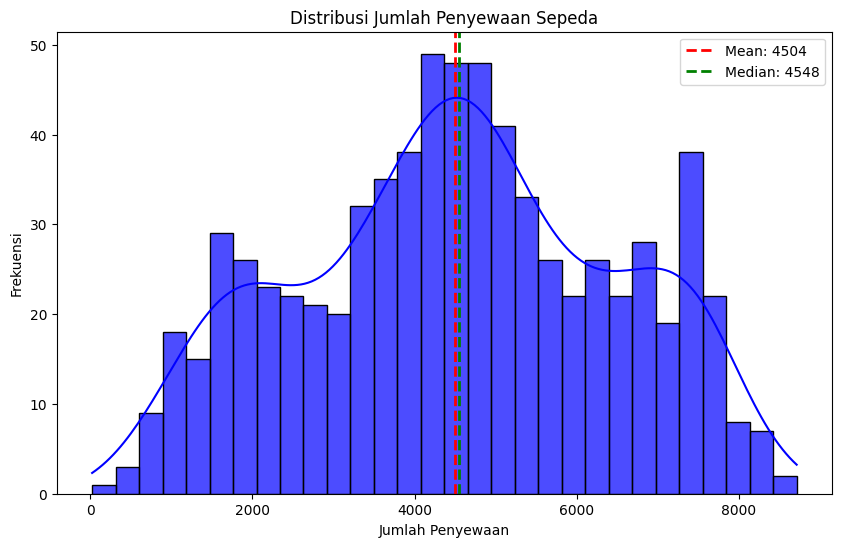

<ipython-input-5-345dfb0c7c9c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=agg_season, palette="coolwarm")


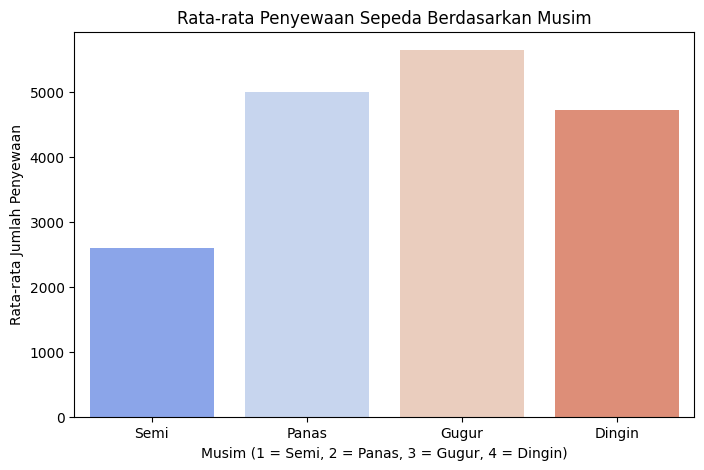

<ipython-input-5-345dfb0c7c9c>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Kategori Hari", y="Total_Penyewaan", data=agg_workingday, palette="coolwarm")


Rata-rata jumlah penyewaan sepeda berdasarkan musim:
    season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921


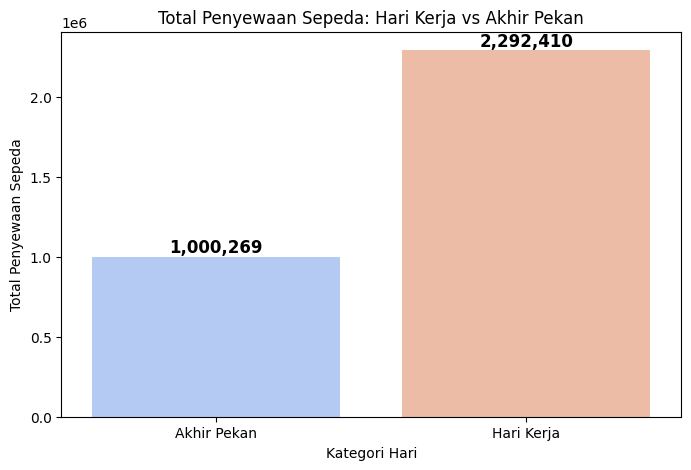

Total dan Rata-rata jumlah penyewaan sepeda berdasarkan kategori hari:
    Total_Penyewaan  Rata_rata_Penyewaan Kategori Hari
0          1000269          4330.168831   Akhir Pekan
1          2292410          4584.820000    Hari Kerja


In [5]:
# Hitung statistik distribusi jumlah penyewaan sepeda
cnt_summary = day_df["cnt"].describe()
print("Ringkasan Statistik Jumlah Penyewaan Sepeda:\n", cnt_summary)

# Visualisasi distribusi jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.histplot(day_df["cnt"], bins=30, kde=True, color="blue", edgecolor="black", alpha=0.7)
plt.axvline(cnt_summary["mean"], color="red", linestyle="dashed", linewidth=2, label=f"Mean: {cnt_summary['mean']:.0f}")
plt.axvline(cnt_summary["50%"], color="green", linestyle="dashed", linewidth=2, label=f"Median: {cnt_summary['50%']:.0f}")
plt.title("Distribusi Jumlah Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

# Agregasi rata-rata penyewaan sepeda berdasarkan musim
agg_season = day_df.groupby("season")["cnt"].mean().reset_index()

# Visualisasi jumlah penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="cnt", data=agg_season, palette="coolwarm")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim (1 = Semi, 2 = Panas, 3 = Gugur, 4 = Dingin)")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xticks(ticks=[0,1,2,3], labels=["Semi", "Panas", "Gugur", "Dingin"])
plt.show()

# Tampilkan hasil agregasi
print("Rata-rata jumlah penyewaan sepeda berdasarkan musim:\n", agg_season)

# Agregasi total dan rata-rata penyewaan sepeda berdasarkan kategori hari kerja dan akhir pekan
agg_workingday = day_df.groupby("workingday").agg(Total_Penyewaan=("cnt", "sum"), Rata_rata_Penyewaan=("cnt", "mean")).reset_index()

# Ubah nilai 0 dan 1 menjadi label yang lebih mudah dipahami
agg_workingday["Kategori Hari"] = agg_workingday["workingday"].map({0: "Akhir Pekan", 1: "Hari Kerja"})
agg_workingday.drop(columns=["workingday"], inplace=True)  # Hapus kolom asli setelah dipetakan

# Visualisasi perbandingan total penyewaan sepeda antara hari kerja dan akhir pekan
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Kategori Hari", y="Total_Penyewaan", data=agg_workingday, palette="coolwarm")

# Menambahkan angka total penyewaan di atas tiap batang
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=12, color="black", fontweight="bold")

plt.title("Total Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Kategori Hari")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

# Tampilkan hasil agregasi
print("Total dan Rata-rata jumlah penyewaan sepeda berdasarkan kategori hari:\n", agg_workingday)

**Insight:**
- Pola Distribusi Jumlah Penyewaan Sepeda: Distribusi penyewaan sepeda menunjukkan pola yang tidak simetris dengan mayoritas penyewaan berkisar antara 4.000 hingga 6.000 per hari. Nilai median lebih kecil dari mean, menunjukkan adanya beberapa hari dengan jumlah penyewaan sangat tinggi yang menyebabkan distribusi sedikit condong ke kanan (right-skewed). Musim Berpengaruh Signifikan terhadap Penyewaan: Penyewaan tertinggi terjadi di musim panas, kemungkinan karena cuaca lebih nyaman untuk bersepeda.
- Jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, yang menunjukkan bahwa mayoritas pengguna menggunakan sepeda untuk keperluan komuter atau aktivitas rutin pada hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-6-fc31bd5143ea>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=agg_season, palette="coolwarm")


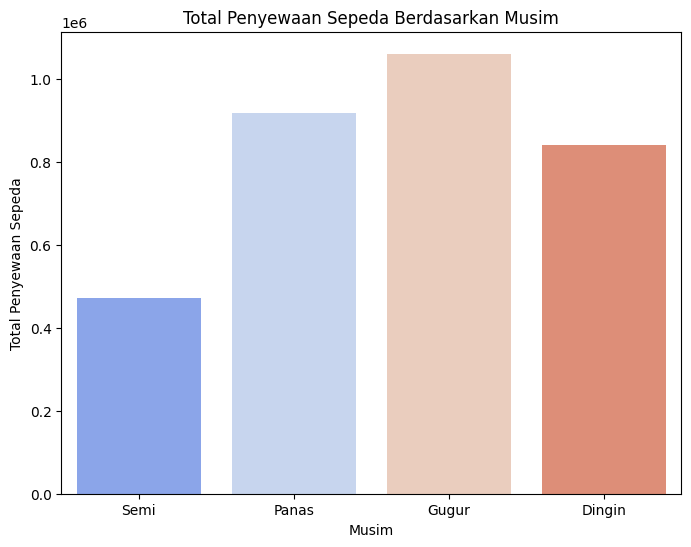

Total penyewaan sepeda berdasarkan musim:
    season      cnt
0    Semi   471348
1   Panas   918589
2   Gugur  1061129
3  Dingin   841613


In [6]:
# Agregasi total jumlah penyewaan berdasarkan musim
agg_season = day_df.groupby("season")["cnt"].sum().reset_index()

# Mapping label musim agar lebih mudah dipahami
season_labels = {1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"}
agg_season["season"] = agg_season["season"].map(season_labels)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x="season", y="cnt", data=agg_season, palette="coolwarm")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim")
plt.xticks(rotation=0)
plt.show()

# Menampilkan hasil agregasi
print("Total penyewaan sepeda berdasarkan musim:\n", agg_season)

### Pertanyaan 2:

<ipython-input-16-4291e04ca162>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="kategori_hari", y="cnt", data=agg_weekday_vs_weekend, palette=["royalblue", "darkorange"])


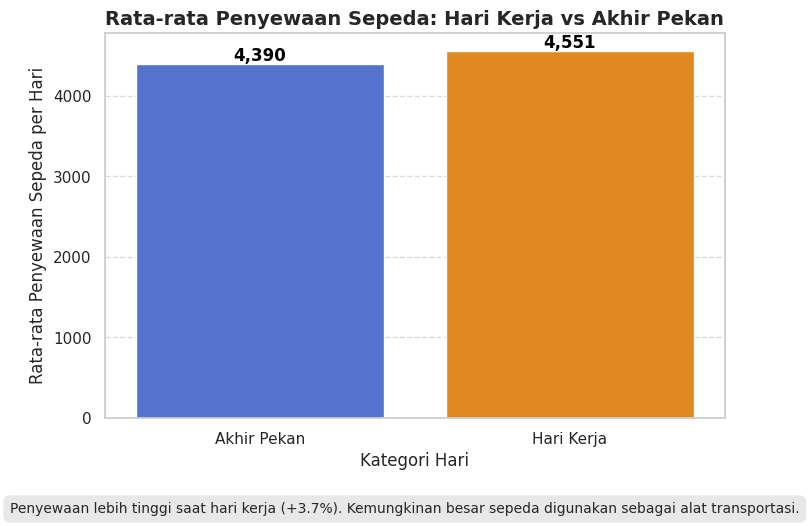

📌 Rata-rata penyewaan sepeda berdasarkan kategori hari:
   kategori_hari          cnt
0   Akhir Pekan  4389.685714
1    Hari Kerja  4550.566219
📢 Interpretasi: Penyewaan lebih tinggi saat hari kerja (+3.7%). Kemungkinan besar sepeda digunakan sebagai alat transportasi.


In [16]:
# Konversi kolom tanggal ke format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Tambahkan kolom untuk hari dalam seminggu (0 = Senin, 6 = Minggu)
day_df["day_of_week"] = day_df["dteday"].dt.dayofweek

# Kategorikan sebagai hari kerja atau akhir pekan
day_df["kategori_hari"] = day_df["day_of_week"].apply(lambda x: "Hari Kerja" if x < 5 else "Akhir Pekan")

# Agregasi rata-rata penyewaan berdasarkan kategori hari
agg_weekday_vs_weekend = day_df.groupby("kategori_hari")["cnt"].mean().reset_index()

# Hitung selisih dan persentase perbedaan
workday_avg = agg_weekday_vs_weekend.loc[agg_weekday_vs_weekend["kategori_hari"] == "Hari Kerja", "cnt"].values[0]
weekend_avg = agg_weekday_vs_weekend.loc[agg_weekday_vs_weekend["kategori_hari"] == "Akhir Pekan", "cnt"].values[0]
diff = abs(workday_avg - weekend_avg)
percent_diff = (diff / min(workday_avg, weekend_avg)) * 100

# Tentukan interpretasi otomatis
if workday_avg > weekend_avg:
    interpretation = f"Penyewaan lebih tinggi saat hari kerja (+{percent_diff:.1f}%). Kemungkinan besar sepeda digunakan sebagai alat transportasi."
else:
    interpretation = f"Penyewaan lebih tinggi saat akhir pekan (+{percent_diff:.1f}%). Sepeda mungkin lebih sering digunakan untuk rekreasi."

# Visualisasi jumlah penyewa di hari kerja vs akhir pekan
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")  # Tema modern
ax = sns.barplot(x="kategori_hari", y="cnt", data=agg_weekday_vs_weekend, palette=["royalblue", "darkorange"])

# Tambahkan label di atas batang
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

# Perbaiki label dan judul agar lebih deskriptif
plt.xlabel("Kategori Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda per Hari", fontsize=12)
plt.title("Rata-rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan", fontsize=14, fontweight="bold")

# Tambahkan deskripsi tambahan dengan interpretasi otomatis
plt.figtext(0.5, -0.08, interpretation, ha="center", fontsize=10, bbox=dict(facecolor="lightgray", alpha=0.5, boxstyle="round,pad=0.5"))

# Tambahkan grid horizontal untuk memperjelas perbedaan
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Menampilkan hasil agregasi
print("📌 Rata-rata penyewaan sepeda berdasarkan kategori hari:\n", agg_weekday_vs_weekend)
print("📢 Interpretasi:", interpretation)

**Insight:**
- Musim panas memiliki jumlah penyewaan sepeda tertinggi, sedangkan musim dingin paling rendah. Ini menunjukkan bahwa cuaca hangat lebih menarik untuk bersepeda dibandingkan cuaca dingin.
- Penyewaan sepeda menunjukkan pola berbeda antara hari kerja dan akhir pekan. Jika lebih tinggi di hari kerja, sepeda kemungkinan besar digunakan untuk transportasi. Jika lebih tinggi di akhir pekan, sepeda lebih banyak digunakan untuk rekreasi. Pola ini dapat membantu dalam perencanaan layanan dan strategi pemasaran.

## Analisis Lanjutan (Opsional)

## Conclusion

- Pengaruh Musim terhadap Penyewaan Sepeda: Musim panas mencatat jumlah penyewaan sepeda tertinggi karena kondisi cuaca yang lebih mendukung aktivitas luar ruangan. Sebaliknya, musim dingin memiliki penyewaan terendah, kemungkinan akibat suhu dingin dan kondisi jalan yang kurang mendukung.
- Dari analisis jumlah penyewaan sepeda berdasarkan kategori hari, terlihat bahwa penyewaan sepeda pada akhir pekan cenderung lebih rendah dibandingkan hari kerja. Hal ini mungkin disebabkan oleh tingginya penggunaan sepeda untuk keperluan transportasi harian saat hari kerja.